In [46]:
import os
os.chdir('D:\python')
os.getcwd()

'D:\\python'

In [47]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('Retail_Data_Transactions.csv', parse_dates=['trans_date'])

In [95]:
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    125000 non-null object
trans_date     125000 non-null datetime64[ns]
tran_amount    125000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [97]:
data.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [98]:
data.columns

Index(['customer_id', 'trans_date', 'tran_amount'], dtype='object')

In [99]:
filtered_data=data[['tran_amount', 'customer_id' ]].drop_duplicates()


In [100]:
filtered_data.head(2)

,tran_amount,customer_id
0,35,CS5295
1,39,CS4768


In [101]:
data['trans_date'].min(),data['trans_date'].max()


(Timestamp('2011-05-16 00:00:00'), Timestamp('2015-03-16 00:00:00'))

In [102]:
sd = dt.datetime(2019,7,12)
data['hist']=sd - data['trans_date']
data['hist'].astype('timedelta64[D]')
data['hist']=data['hist'] / np.timedelta64(1, 'D')
data.head()

,customer_id,trans_date,tran_amount,hist
0,CS5295,2013-02-11,35,2342.0
1,CS4768,2015-03-15,39,1580.0
2,CS2122,2013-02-26,52,2327.0
3,CS1217,2011-11-16,99,2795.0
4,CS1850,2013-11-20,78,2060.0


In [57]:
data=data[data['hist'] < 2200]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55172 entries, 1 to 124999
Data columns (total 4 columns):
customer_id    55172 non-null object
trans_date     55172 non-null datetime64[ns]
tran_amount    55172 non-null int64
hist           55172 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [103]:
rfm = data.groupby('customer_id').agg({'hist': lambda x:x.min(), # Recency
                                        'customer_id': lambda x: len(x),               # Frequency
                                        'tran_amount': lambda x: x.sum()})          # Monetary Value


In [104]:
rfm.head()

,hist,customer_id,tran_amount
customer_id,,,
CS1112,1640.0,15,1012
CS1113,1614.0,20,1490
CS1114,1611.0,19,1432
CS1115,1590.0,22,1659
CS1116,1782.0,13,857


In [105]:
rfm.columns


Index(['hist', 'customer_id', 'tran_amount'], dtype='object')

In [106]:
rfm.columns=['recency','frequency','monetary']


In [107]:
data[data['customer_id']=='CS1112']

,customer_id,trans_date,tran_amount,hist
5650,CS1112,2015-01-14,39,1640.0
17810,CS1112,2014-07-16,90,1822.0
26626,CS1112,2014-04-29,63,1900.0
31500,CS1112,2014-12-04,59,1681.0
36486,CS1112,2012-04-08,56,2651.0
40368,CS1112,2012-12-15,76,2400.0
42084,CS1112,2013-07-01,36,2202.0
67735,CS1112,2012-07-03,81,2565.0
68206,CS1112,2011-10-02,60,2840.0
74842,CS1112,2013-11-13,71,2067.0


In [108]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,1640.0,15,1012
CS1113,1614.0,20,1490
CS1114,1611.0,19,1432
CS1115,1590.0,22,1659
CS1116,1782.0,13,857
CS1117,1836.0,17,1185
CS1118,1581.0,15,1011
CS1119,1590.0,15,1158
CS1120,1589.0,24,1677


In [109]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['4','3','2','1'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [110]:
rfm.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
CS1112,1640.0,15,1012,2,3,3
CS1113,1614.0,20,1490,3,2,2
CS1114,1611.0,19,1432,3,2,2
CS1115,1590.0,22,1659,4,2,1
CS1116,1782.0,13,857,1,4,3


In [111]:
rfm['Total_score'] = rfm.r_quartile.astype(int)+ rfm.f_quartile.astype(int) + rfm.m_quartile.astype(int)


In [112]:
rfm['Total_score'].head() 

customer_id
CS1112    8
CS1113    7
CS1114    7
CS1115    7
CS1116    8
Name: Total_score, dtype: int32

In [113]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)


In [114]:
rfm['RFM_Score'].head()

customer_id
CS1112    233
CS1113    322
CS1114    322
CS1115    421
CS1116    143
Name: RFM_Score, dtype: object

In [115]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,Total_score,RFM_Score
customer_id,,,,,,,,
CS1112,1640.0,15,1012,2,3,3,8,233
CS1113,1614.0,20,1490,3,2,2,7,322
CS1114,1611.0,19,1432,3,2,2,7,322
CS1115,1590.0,22,1659,4,2,1,7,421
CS1116,1782.0,13,857,1,4,3,8,143


In [116]:
rfm[rfm['RFM_Score']=='321'].sort_values('monetary', ascending=False).head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,Total_score,RFM_Score
customer_id,,,,,,,,
CS5670,1612.0,22,1811,3,2,1,6,321
CS5306,1617.0,22,1788,3,2,1,6,321
CS6058,1622.0,22,1745,3,2,1,6,321
CS5816,1609.0,22,1736,3,2,1,6,321
CS3611,1610.0,22,1729,3,2,1,6,321


In [117]:
rfm.sort_values(by=['RFM_Score', 'monetary'], ascending=[True, False]).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,Total_score,RFM_Score
customer_id,,,,,,,,
CS3799,1730.0,36,2513,1,1,1,3,111
CS2951,1776.0,32,2382,1,1,1,3,111
CS1215,1712.0,35,2362,1,1,1,3,111
CS2620,1721.0,35,2360,1,1,1,3,111
CS1580,1769.0,33,2329,1,1,1,3,111


In [118]:
rfm.sort_values(by=['RFM_Score', 'monetary'], ascending=[True, False]).tail()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,Total_score,RFM_Score
customer_id,,,,,,,,
CS8562,1590.0,6,250,4,4,4,12,444
CS8763,1579.0,6,237,4,4,4,12,444
CS7556,1601.0,6,202,4,4,4,12,444
CS7889,1596.0,5,198,4,4,4,12,444
CS8077,1594.0,5,164,4,4,4,12,444


In [119]:
rfm.groupby('RFM_Score').agg('monetary').mean().head()

RFM_Score
111    1796.797546
112    1486.666667
113    1036.000000
121    1589.954545
122    1386.672131
Name: monetary, dtype: float64

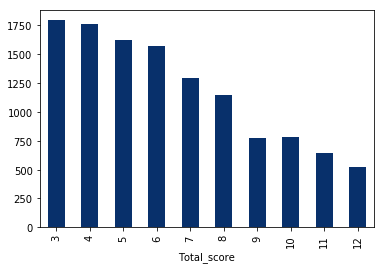

In [120]:
rfm.groupby('Total_score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')

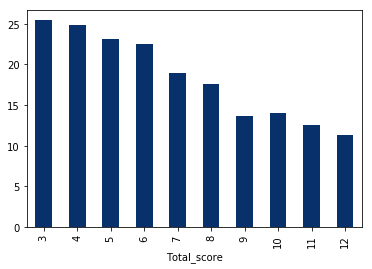

In [121]:
rfm.groupby('Total_score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

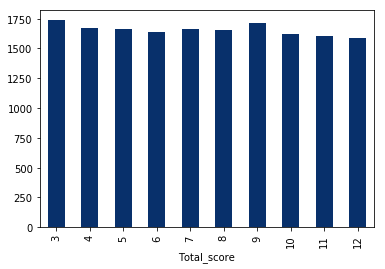

In [122]:
rfm.groupby('Total_score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [123]:
res_data = pd.read_csv('Retail_Data_Response.csv')

In [124]:
res_data.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [125]:
rfm.reset_index(inplace=True)
rfm.head()

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,Total_score,RFM_Score
0,CS1112,1640.0,15,1012,2,3,3,8,233
1,CS1113,1614.0,20,1490,3,2,2,7,322
2,CS1114,1611.0,19,1432,3,2,2,7,322
3,CS1115,1590.0,22,1659,4,2,1,7,421
4,CS1116,1782.0,13,857,1,4,3,8,143


In [126]:
rfm.sort_values('customer_id', inplace=True)
rfm2=pd.merge(rfm, res_data, on='customer_id')

In [127]:
rfm2.head()

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,Total_score,RFM_Score,response
0,CS1112,1640.0,15,1012,2,3,3,8,233,0
1,CS1113,1614.0,20,1490,3,2,2,7,322,0
2,CS1114,1611.0,19,1432,3,2,2,7,322,1
3,CS1115,1590.0,22,1659,4,2,1,7,421,1
4,CS1116,1782.0,13,857,1,4,3,8,143,1


In [128]:
rfm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 10 columns):
customer_id    6884 non-null object
recency        6884 non-null float64
frequency      6884 non-null int64
monetary       6884 non-null int64
r_quartile     6884 non-null category
f_quartile     6884 non-null category
m_quartile     6884 non-null category
Total_score    6884 non-null int32
RFM_Score      6884 non-null object
response       6884 non-null int64
dtypes: category(3), float64(1), int32(1), int64(3), object(2)
memory usage: 424.1+ KB


Text(0, 0.5, 'Proportion of Responders')

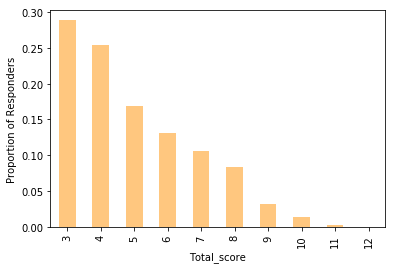

In [129]:
ax=rfm2.groupby('Total_score').agg('response').mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total_score")
ax.set_ylabel("Proportion of Responders")